# High Pressure Pump Study

This scenario explores what would happen if the high pressure (HP) pump lost 1% increments in its output pressure, and how it affects overall cycle thermal efficiency.

In [49]:
from iapws import IAPWS97
from custom_thermo import custom_thermo as ct
import time

eta_turbine = 0.86
eta_pump = 0.8

In [50]:
p4_list = [5,4.95,4.9,4.85,4.8,4.75,4.7,4.65,4.6,4.55,4.5,4.46,4.42,4.38,4.34,4.3,4.26,4.22,4.18,4.14
]

In [51]:
# Start timer
tic = time.perf_counter()

eta_th_list = []

for x in range(len(p4_list)):
#     print(p4_list[x])
    p1 = 0.01 # 10 kPa
    T1 = 42 + 273.15 # kelvins
    p2 = 0.4 # 400 kPa
    p3 = p2
    p8 = p2
    p4 = p4_list[x] # MPa
    p5 = p4 * (1-0.04) # MPa, 4% less than p4
    T5 = 130 + 273.15 # kelvins
    p6 = p5 * (1-0.16) # MPa, 16% less than p5
    T6 = 400 + 273.15 # kelvins, 
    p7 = p6 * (1-0.05) # MPa, 5% less than p6
    T7 = T6 * (1-0.03) # kelvins, 3% less than T6
    p9 = p1
   
    sat_liquid1 = IAPWS97(P=p1,x=0)
    v1 = sat_liquid1.v
    h1 = sat_liquid1.h
    w_pump1 = v1*(p2-p1) / eta_pump * 1000
    h2 = h1 + w_pump1
    vapor7 = IAPWS97(P=p7,T=T7)
    s7 = vapor7.s
    s8 = s7
    s9 = s7
    h7 = vapor7.h
    x8 = ct.find_quality(P=p8,s=s8)
    x9 = ct.find_quality(P=p9,s=s9)
    vapor8 = IAPWS97(P=p8,x=x8)
    h8 = vapor8.h
    vapor9 = IAPWS97(P=p9,x=x9)
    h9 = vapor9.h
    liquid3 = IAPWS97(P=p3,x=0)
    h3 = liquid3.h
    y = (h3-h2)/(h8-h2)
    w_turbine = (h7 - (h8*y + h9*(1-y)))*eta_turbine
    v3 = liquid3.v
    w_pump2 = v3*(p4-p3) / eta_pump * 1000
    h4 = h3 + w_pump2
    liquid5 = IAPWS97(T=T5,x=0)
    h5 = liquid5.h
    vapor6 = IAPWS97(T=T6,P=p6)
    h6 = vapor6.h
    q_H = h6 - h5
    eta_th = (w_turbine - w_pump1 - w_pump2) / q_H * 100
    eta_th_list.append(eta_th)

toc = time.perf_counter()
print(f"Program run in {toc - tic:0.4f} seconds")

Program run in 0.0500 seconds


<IPython.core.display.Javascript object>


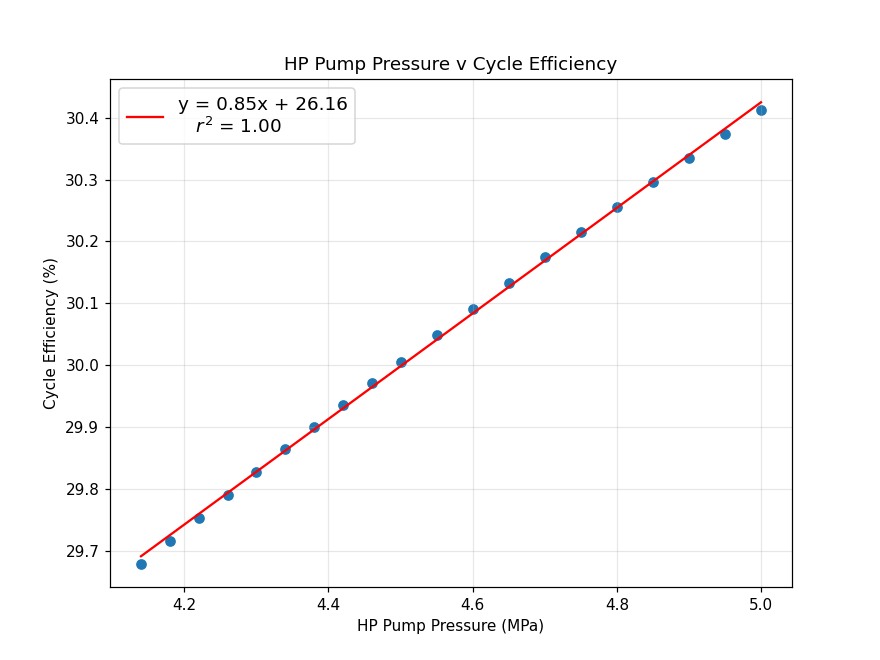

In [52]:
%matplotlib notebook

import matplotlib.pyplot as plt

plt.figure(edgecolor='white',figsize=(8,6))
plt.scatter(p4_list,eta_th_list)
plt.title("HP Pump Pressure v Cycle Efficiency")
plt.ylabel("Cycle Efficiency (%)")
plt.xlabel("HP Pump Pressure (MPa)")
plt.grid(True,alpha=0.3)
plt.show()

### Analysis

As the high pressure pump pressure declines, so does the thermal cycle efficiency.

In [53]:
from scipy.stats import linregress

x_values = pd.Series(p4_list)
y_values = eta_th_list
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
line = x_values * slope + intercept
plt.plot(x_values, line, 'r', label='y = {:.2f}x + {:.2f}\n   $r^2$ = {:.2f}'.format(slope,intercept,rvalue))
plt.legend(fontsize=12)